
# **K-means Cluster**：
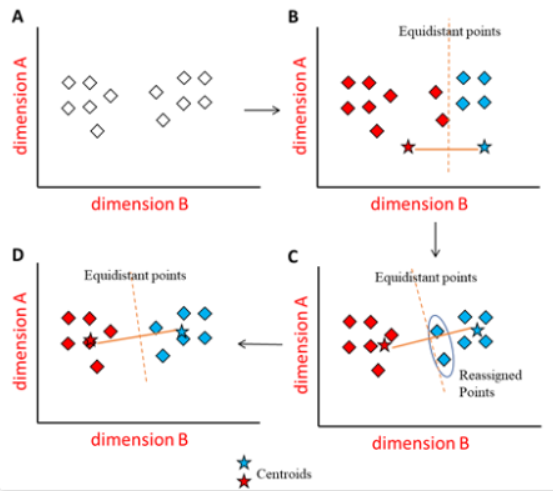



####1.   unsupervised learning 
####2.   steps:
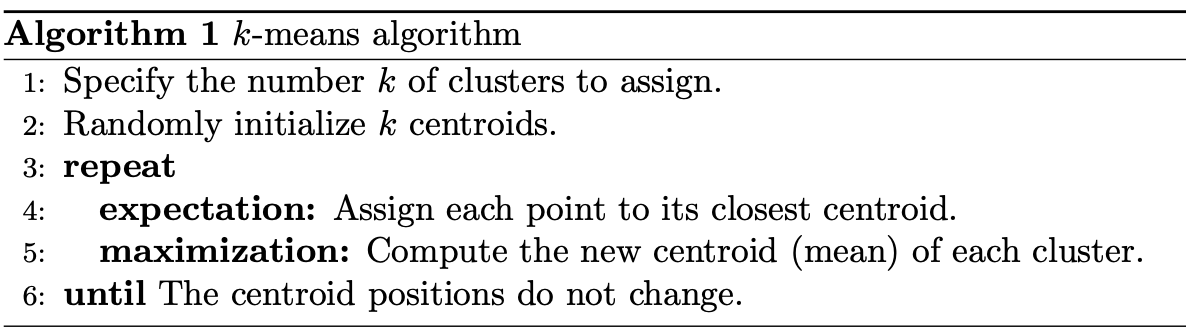




In [ ]:
# SKlearn library import kmeans model
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'


### **Loading Data:**

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mubaris/friendly-fortnight/master/xclara.csv'
data = pd.read_csv(url)
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      3000 non-null   float64
 1   V2      3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [ ]:
data.describe()
## seems no data processing needed

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


In [ ]:
x = []
y = []

x = data.iloc[:,0]
y = data.iloc[:,1]
print(x)
print(y)

0        2.072345
1       17.936710
2        1.083576
3       11.120670
4       23.711550
          ...    
2995    85.652800
2996    82.770880
2997    64.465320
2998    90.722820
2999    64.879760
Name: V1, Length: 3000, dtype: float64
0       -3.241693
1       15.784810
2        7.319176
3       14.406780
4        2.557729
          ...    
2995    -6.461061
2996    -2.373299
2997   -10.501360
2998   -12.255840
2999   -24.877310
Name: V2, Length: 3000, dtype: float64


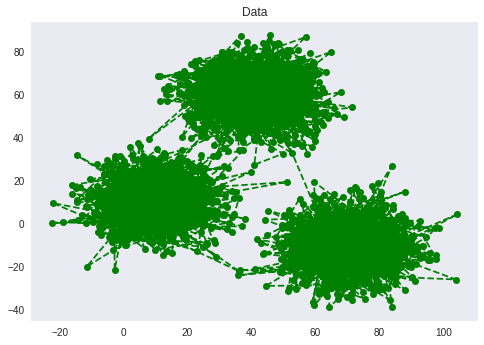

In [ ]:
plt.plot(x, y, color = 'g', linestyle = 'dashed',
         marker = 'o')

plt.title('Data')
plt.grid()
plt.show()

### **Kmeans Cluster:**
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

In [ ]:
model = KMeans(n_clusters=3,).fit_predict(data)
print(model)
print(type(model))
modell = KMeans(n_clusters=3,).fit(data)
print(modell)
print(type(modell))

[1 1 1 ... 0 0 0]
<class 'numpy.ndarray'>
KMeans(n_clusters=3)
<class 'sklearn.cluster._kmeans.KMeans'>


In [ ]:
modell.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
kc = modell.cluster_centers_
print(kc[:, 0])
print(kc[:,1])

[69.92418447  9.4780459  40.68362784]
[-10.11964119  10.686052    59.71589274]


### **Visualize:**
plot the 3 clusters

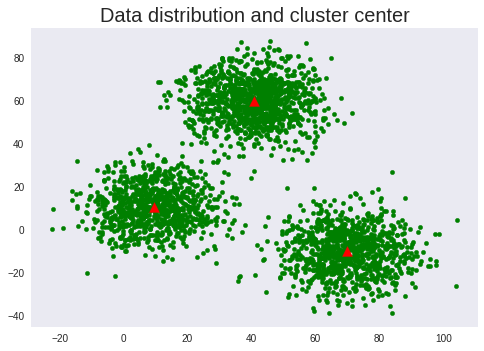

In [ ]:
plt.scatter(x, y, color = 'g', s = 20)
plt.scatter(kc[:,0],kc[:,1], color = 'r', marker='^', s=100)
plt.title('Data distribution and cluster center',fontsize = 20)
plt.grid()
plt.show()

## **Part 2**: Choosing the appropriate number of K

#### Two metrics we can use: **elbow method** and the **silhouette coefficient**

### **Part 2A**: Elbow Method

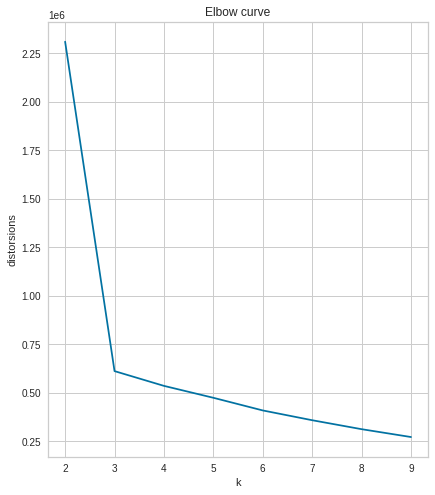

In [ ]:
# Specifying the dataset and initializing variables
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distorsions.append(kmeans.inertia_) ##簇内平方和

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.ylabel('distorsions')
plt.plot(range(2, 10), distorsions)
plt.grid(True)


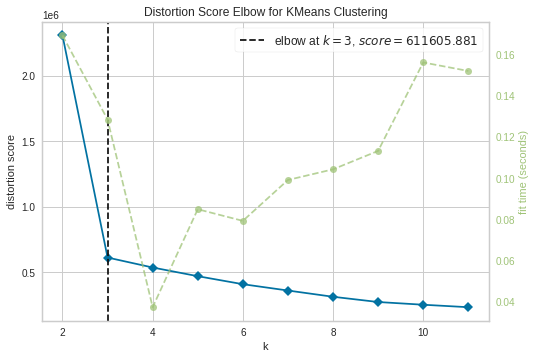

In [ ]:
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=3,)
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### **Part 2B**: Silhouette coefficient

In [ ]:
# Generate silhouette coefficient for each k
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k)
    cluster_labels = clusters.fit_predict(data)
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)
    silhouette_plot.append(silhouette_avg)

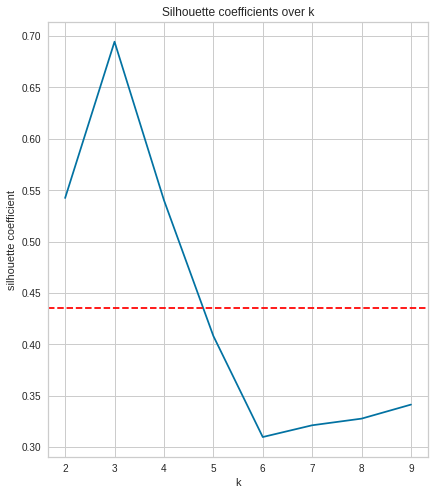

In [ ]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)